## Observations and Insights 

In [96]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
df_combined_mouse_data = pd.merge(study_results, mouse_metadata, how="outer", on="Mouse ID")


# Display the data table for preview
df_combined_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [97]:
# Checking the number of mice.
mouse_id = df_combined_mouse_data["Mouse ID"].count()
pd.DataFrame({"Total Number of Mouse ID": [mouse_id]})

,Total Number of Mouse ID
0,1893


In [98]:
df_combined_mouse_data.count()

Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
dtype: int64

In [99]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = df_combined_mouse_data[df_combined_mouse_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_rows


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [100]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_rows = df_combined_mouse_data[df_combined_mouse_data.duplicated(['Mouse ID','Timepoint'])]
all_duplicate_rows

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [101]:
df_combined_mouse_data.loc[df_combined_mouse_data["Mouse ID"] =="g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [102]:
df_clean_mouse = df_combined_mouse_data.loc[df_combined_mouse_data["Mouse ID"] !="g989"]

df_clean_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [103]:
# Checking the number of mice in the clean DataFrame.
total_mice = df_clean_mouse["Mouse ID"].unique()
len(total_mice)

248

## Summary Statistics

In [104]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = df_clean_mouse.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = df_clean_mouse.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = df_clean_mouse.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_deviation = df_clean_mouse.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = df_clean_mouse.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_stat_mouse_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance,
                                   "Standard Deviation": standard_deviation, "SEM": sem})


summary_stat_mouse_df

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [105]:
# Using the aggregation method, produce the same summary statistics in a single line
summary_stat_mouse_df = df_clean_mouse.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})

summary_stat_mouse_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [106]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
#reset the index, grouping by "Drug Regimen".count())
drug_count_data = pd.DataFrame(df_clean_mouse.groupby(["Drug Regimen"]).count()).reset_index()

#Put in descending order
df_drug_data = drug_count_data.sort_values(by="Drug Regimen", ascending=False)

#Create the drug count data df down to 2 columns
df_drug_data = drug_count_data[["Drug Regimen", "Mouse ID"]]
#Set Index to "Drug Regimen"
df_drug_data = df_drug_data.set_index("Drug Regimen")

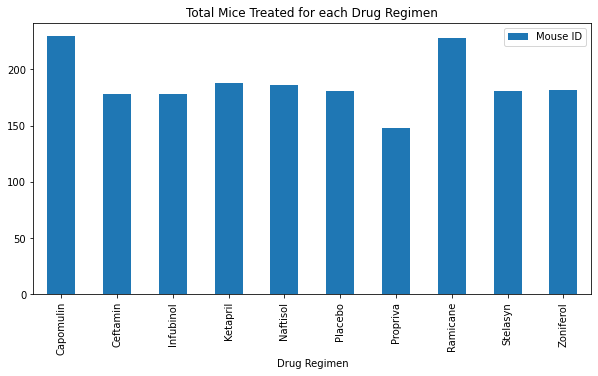

<Figure size 432x288 with 0 Axes>

In [79]:
df_drug_data.plot(kind="bar", figsize=(10,5))


plt.title("Total Mice Treated for each Drug Regimen")
plt.show()
plt.tight_layout()


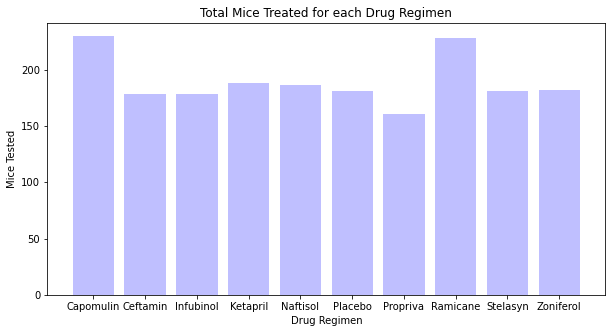

In [107]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
# Create a list of the drugs
drugs_list = summary_stat_mouse_df.index.tolist()
# drugs_list

# Create the drugs into a list
drug_count = (df_combined_mouse_data.groupby(["Drug Regimen"])["Age_months"].count()).tolist()
drug_count


# Create the x_axis to be the above list
x_axis = np.arange(len(drug_count))

x_axis = drugs_list

#Create the bar chat
plt.figure(figsize=(10,5))
plt.bar(x_axis, drug_count, color='b', alpha=0.25, align="center")

plt.title("Total Mice Treated for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Tested");

In [108]:
#Showing the distribution of female versus male mice using pandas

df_genders = pd.DataFrame(df_clean_mouse.groupby(["Sex"]).count()).reset_index()
df_genders.head()

,Sex,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Age_months,Weight (g)
0,Female,922,922,922,922,922,922,922
1,Male,958,958,958,958,958,958,958


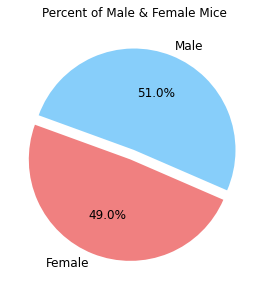

In [81]:

# Generate a pie plot showing the distribution of female versus male mice using pandas

# Create the df_genders dataframe into only two columns
df_genders = df_genders[["Sex", "Mouse ID"]]
#df_genders.head()


# Create the Pir Chart and Customize
plt.figure(figsize=(10,5))
ax1 = plt.subplot(121, aspect="equal")
colors = ["lightcoral", "lightskyblue"]
explode = (0.1,0)
df_genders.plot(kind="pie", y = "Mouse ID", ax=ax1, autopct='%1.1f%%', explode=explode,
               startangle=160, shadow=False, labels=df_genders["Sex"], colors=colors,
              legend=False, fontsize=12)

plt.title("Percent of Male & Female Mice")
plt.xlabel("")
plt.ylabel("");

In [109]:

#Generate the same pie chart from above using PYPLOT
gender_count = (df_clean_mouse.groupby(["Sex"])["Age_months"].count()).tolist()
gender_count

[922, 958]

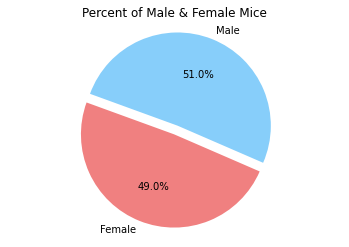

In [110]:

# Add in info from the "Sex" and "Age_months" into the pie chart
labels = ["Female", "Male"]
colors = ["lightcoral", "lightskyblue"]
explode = (0.1,0)

#Create the pie char in pylpot
plt.pie(gender_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=False, startangle=160)
plt.axis("equal");
plt.title("Percent of Male & Female Mice");

## Quartiles, Outliers and Boxplots

In [84]:
df_clean_mouse.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [111]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#Sort and arrange columns: "Drug Regimen", "Mouse ID", and "Timepoint"
df_tumor = df_clean_mouse.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
df_last = df_tumor.loc[df_tumor["Timepoint"]==45]
df_last.head().reset_index()


,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,9,b128,45,38.982878,2,Capomulin,Female,9,22
1,1710,b742,45,38.939633,0,Capomulin,Male,7,21
2,1834,g288,45,37.074024,1,Capomulin,Male,3,19
3,1824,g316,45,40.159220,2,Capomulin,Female,22,22
4,1867,i557,45,47.685963,1,Capomulin,Female,1,24


In [87]:
# Grab the data for each drug and create a dataframe and box and whisker chart for them

#Capomulin
df_capo_box = df_last[df_last["Drug Regimen"].isin(["Capomulin"])]
# df_capo_box.head().reset_index()
# Create Capomulin Tumor Volume (mm3) a df object
capo_object = df_capo_box.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
capo_object = capo_object["Tumor Volume (mm3)"]
# capo_object
#IQR ranges for "Capomulin"
quartiles = capo_object.quantile([.25,.5,.75]).round(2)
lowerq = quartiles[0.25].round(2)
upperq = quartiles[0.75].round(2)
iqr = upperq - lowerq
lower_bound = lowerq - (1.5*iqr).round(2)
upper_bound = upperq + (1.5*iqr).round(2)

print(f'''
        The Lower Quartile of temperature in Capomulin Regimen is: {lowerq}, 
        The Upper Quartile of temperature in Capomulin Regimen is: {upperq}, 
        The IQR of temperature in Capomulin Regimen is: {iqr}, 
        The Median of temperatures for Capomulin Regimen is: {quartiles[0.5]}
        Values below {lower_bound} could be the outliers in Capomulin Regimen
        Values below {upper_bound} could be the outliers in Capomulin Regimen
        ''')


        The Lower Quartile of temperature in Capomulin Regimen is: 32.38, 
        The Upper Quartile of temperature in Capomulin Regimen is: 40.16, 
        The IQR of temperature in Capomulin Regimen is: 7.779999999999994, 
        The Median of temperatures for Capomulin Regimen is: 37.31
        Values below 20.71 could be the outliers in Capomulin Regimen
        Values below 51.83 could be the outliers in Capomulin Regimen
        


In [112]:
# Grab the data for each drug and create a dataframe and box and whisker chart for them

#Ramicane
df_rami_box = df_last[df_last["Drug Regimen"].isin(["Ramicane"])]
# df_capo_box.head().reset_index()
# Create Capomulin Tumor Volume (mm3) a df object
rami_object = df_rami_box.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
rami_object = rami_object["Tumor Volume (mm3)"]
# rami_object
#IQR ranges for "Ramicane"
quartiles = rami_object.quantile([.25,.5,.75]).round(2)
lowerq = quartiles[0.25].round(2)
upperq = quartiles[0.75].round(2)
iqr = upperq - lowerq
lower_bound = lowerq - (1.5*iqr).round(2)
upper_bound = upperq + (1.5*iqr).round(2)

print(f'''
        The Lower Quartile of temperature in the Ramicane Regimen is: {lowerq}, 
        The Upper Quartile of temperature in the Ramicane Regimen is: {upperq}, 
        The IQR of temperature in the Ramicane Regimen is: {iqr}, 
        The Median of temperatures for the Ramicane Regimen is: {quartiles[0.5]}
        Values below {lower_bound} could be the outliers in the Ramicane Regimen
        Values below {upper_bound} could be the outliers in the Ramicane Regimen
        ''')


        The Lower Quartile of temperature in the Ramicane Regimen is: 30.98, 
        The Upper Quartile of temperature in the Ramicane Regimen is: 38.51, 
        The IQR of temperature in the Ramicane Regimen is: 7.529999999999998, 
        The Median of temperatures for the Ramicane Regimen is: 34.85
        Values below 19.69 could be the outliers in the Ramicane Regimen
        Values below 49.8 could be the outliers in the Ramicane Regimen
        


In [89]:
# Grab the data for each drug and create a dataframe and box and whisker chart for them

#Infubinol
df_infu_box = df_last[df_last["Drug Regimen"].isin(["Infubinol"])]
# df_capo_box.head().reset_index()
# Create Capomulin Tumor Volume (mm3) a df object
infu_object = df_infu_box.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
infu_object = infu_object["Tumor Volume (mm3)"]
# infu_object
#IQR ranges for "Infubinol"
quartiles = infu_object.quantile([.25,.5,.75]).round(2)
lowerq = quartiles[0.25].round(2)
upperq = quartiles[0.75].round(2)
iqr = upperq - lowerq
lower_bound = lowerq - (1.5*iqr).round(2)
upper_bound = upperq + (1.5*iqr).round(2)

print(f'''
        The Lower Quartile of temperature in the Infubinol Regimen is: {lowerq}, 
        The Upper Quartile of temperature in the Infubinol Regimen is: {upperq}, 
        The IQR of temperature in the Infubinol Regimen is: {iqr}, 
        The Median of temperatures for the Infubinol Regimen is: {quartiles[0.5]}
        Values below {lower_bound} could be the outliers in the Infubinol Regimen
        Values below {upper_bound} could be the outliers in the Infubinol Regimen
        ''')


        The Lower Quartile of temperature in the Infubinol Regimen is: 62.75, 
        The Upper Quartile of temperature in the Infubinol Regimen is: 67.69, 
        The IQR of temperature in the Infubinol Regimen is: 4.939999999999998, 
        The Median of temperatures for the Infubinol Regimen is: 66.08
        Values below 55.34 could be the outliers in the Infubinol Regimen
        Values below 75.1 could be the outliers in the Infubinol Regimen
        


In [113]:
# Grab the data for each drug and create a dataframe and box and whisker chart for them

#Ceftamin
df_ceft_box = df_last[df_last["Drug Regimen"].isin(["Ceftamin"])]
# df_capo_box.head().reset_index()
# Create Capomulin Tumor Volume (mm3) a df object
ceft_object = df_ceft_box.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ceft_object = ceft_object["Tumor Volume (mm3)"]
# ceft_object
#IQR ranges for "Ceftamin"
quartiles = ceft_object.quantile([.25,.5,.75]).round(2)
lowerq = quartiles[0.25].round(2)
upperq = quartiles[0.75].round(2)
iqr = upperq - lowerq
lower_bound = lowerq - (1.5*iqr).round(2)
upper_bound = upperq + (1.5*iqr).round(2)

print(f'''
        The Lower Quartile of temperature in the Ceftamin Regimen is: {lowerq}, 
        The Upper Quartile of temperature in the Ceftamin Regimen is: {upperq}, 
        The IQR of temperature in the Ceftamin Regimen is: {iqr}, 
        The Median of temperatures for the Ceftamin Regimen is: {quartiles[0.5]}
        Values below {lower_bound} could be the outliers in the Ceftamin Regimen
        Values below {upper_bound} could be the outliers in the Ceftamin Regimen
        ''')


        The Lower Quartile of temperature in the Ceftamin Regimen is: 61.43, 
        The Upper Quartile of temperature in the Ceftamin Regimen is: 67.53, 
        The IQR of temperature in the Ceftamin Regimen is: 6.100000000000001, 
        The Median of temperatures for the Ceftamin Regimen is: 64.3
        Values below 52.28 could be the outliers in the Ceftamin Regimen
        Values below 76.68 could be the outliers in the Ceftamin Regimen
        


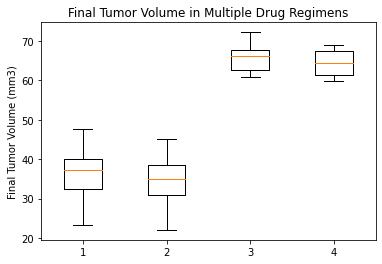

In [114]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
combined_box_plot = [capo_object, rami_object, infu_object, ceft_object]

# Use the above list to plot all four boxes into fig5
fig5, ax5 = plt.subplots()
ax5.set_title("Final Tumor Volume in Multiple Drug Regimens")
ax5.set_ylabel("Final Tumor Volume (mm3)")
ax5.boxplot(combined_box_plot)
plt.show()

## Line and Scatter Plots

In [127]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Create a DF with just capomulin data
df_capomulin = df_clean_mouse.loc[df_combined_mouse_data["Drug Regimen"] == "Capomulin"]
df_capomulin = df_capomulin.reset_index()

#Get data for one mouse
mouse_capo = df_capomulin.loc[df_capomulin["Mouse ID"] == "m601"]
mouse_capo


,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
220,1883,m601,0,45.000000,0,Capomulin,Male,22,17
221,1884,m601,5,41.408591,1,Capomulin,Male,22,17
222,1885,m601,10,36.825367,1,Capomulin,Male,22,17
223,1886,m601,15,35.464612,1,Capomulin,Male,22,17
224,1887,m601,20,34.255732,1,Capomulin,Male,22,17
225,1888,m601,25,33.118756,1,Capomulin,Male,22,17
226,1889,m601,30,31.758275,1,Capomulin,Male,22,17
227,1890,m601,35,30.834357,1,Capomulin,Male,22,17
228,1891,m601,40,31.378045,1,Capomulin,Male,22,17
229,1892,m601,45,28.430964,1,Capomulin,Male,22,17


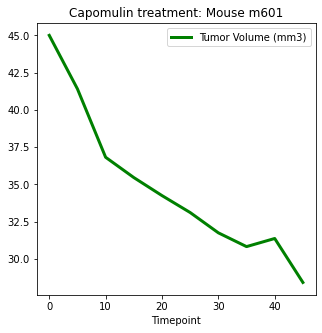

In [128]:

# Grab the timepoint and tumor volume for this one mouse, and arrange into two columns
mouse_capo = mouse_capo.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
#Reset the index 
mouse_capo = mouse_capo.reset_index(drop=True)


# Create the line plot showing the Capomulin treatment with this one mouse
mouse_capo.set_index("Timepoint").plot(figsize=(5,5), linewidth=3, color="green", title="Capomulin treatment: Mouse m601");

In [129]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# Use the capomulin dataframe, and arrange into 3 columns "Mouse ID", "Weight (g)", and "Tumor Volume (mm3)" 
df_mouse_weight = df_capomulin.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]

In [130]:

#Get average tumor volume for each mouse under Capomulin regimen..put into DataFrame
average_tumor_volume = pd.DataFrame(df_mouse_weight.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()

#rename tumor volume (mm3) to Average Tumor Volume...rename(columns={"":""})...refer stack overflow
average_tumor_volume = average_tumor_volume.rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume"})
average_tumor_volume.head()

,Mouse ID,Weight (g),Average Tumor Volume
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


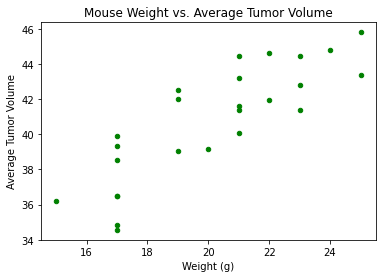

In [131]:
#Create the Scatter plot of the above data
average_tumor_volume.plot(kind="scatter", x="Weight (g)", y="Average Tumor Volume", figsize=(6,4), color="green", title="Mouse Weight vs. Average Tumor Volume")
plt.show()

## Correlation and Regression

In [120]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mice_weight = average_tumor_volume.iloc[:,2]
tumor_volume = average_tumor_volume.iloc[:,1]
#compute Pearson correlation between the two
correlation = st.pearsonr(mice_weight,tumor_volume)
print(f'''
The Correlation Coefficient between mouse weight and tumor volume is {round(correlation[0],2)}
''')


The Correlation Coefficient between mouse weight and tumor volume is 0.84



In [134]:
from scipy.stats import linregress

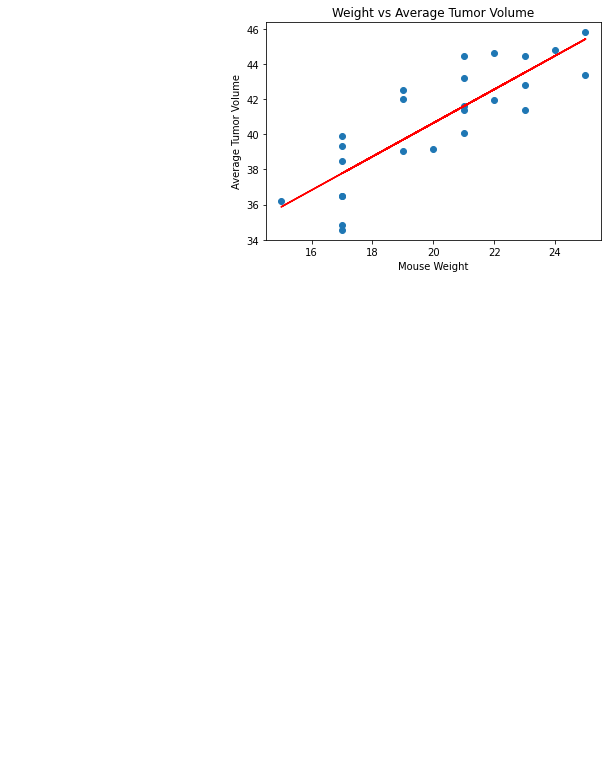

In [135]:
# Create a line of regression for 

# Add the linear regression equation and line to plot

x_values = average_tumor_volume['Weight (g)']
y_values = average_tumor_volume['Average Tumor Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(6,5), fontsize=12)
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.title("Weight vs Average Tumor Volume")
plt.show()